# Proyecto Final - Recurrencia diferenciada del cáncer de tiroides

https://archive.ics.uci.edu/dataset/915/differentiated+thyroid+cancer+recurrence


Este conjunto de datos contiene 13 características clinicopatológicas con el objetivo de predecir la recurrencia del cáncer de tiroides bien diferenciado. El conjunto de datos se recopiló en una duración de 15 años y se realizó un seguimiento de cada paciente durante al menos 10 años.

### Integrantes:
### Laura David
### Mónica González

In [39]:
# importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder


# Analisis del Data set

In [3]:
# Cargar los datos de entrenamiento
data_train = pd.read_csv("dataset/Thyroid_Diff.csv")

In [4]:
# Dimensiones de train
data_train.shape

(383, 17)

In [5]:
# Información de los datos de entrenamiento
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

### CORRECCION DE LOS TIPOS DE DATOS

Se hizo revisión del data set y se identificaron cuales serían las variables numéricas y cuales las categóricas. Y se sacó el listado de cada una de ellas.

In [6]:
# Corregir el tipo de los datos: se tiene un array con las variables numericas 
# y se convierten a categoricas las que no estén en el 
num_cols = [
'Age']

# Columnas catagoricas de train
cat_cols_train = []

for col in data_train.columns:
    if col not in num_cols:
        data_train[col] = data_train[col].astype('category')
        cat_cols_train.append(col)

In [7]:
# Información de los datos de entrenamiento
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Age                   383 non-null    int64   
 1   Gender                383 non-null    category
 2   Smoking               383 non-null    category
 3   Hx Smoking            383 non-null    category
 4   Hx Radiothreapy       383 non-null    category
 5   Thyroid Function      383 non-null    category
 6   Physical Examination  383 non-null    category
 7   Adenopathy            383 non-null    category
 8   Pathology             383 non-null    category
 9   Focality              383 non-null    category
 10  Risk                  383 non-null    category
 11  T                     383 non-null    category
 12  N                     383 non-null    category
 13  M                     383 non-null    category
 14  Stage                 383 non-null    category
 15  Respon

### TRATAMIENTO DE DATOS NULOS

In [8]:
# Analisis de datos faltantes en train
missing_values_train = data_train.isnull().sum()
print("Porcentaje de datos nulos en train:", len(missing_values_train[missing_values_train>0]*100/len(data_train)))

Porcentaje de datos nulos en train: 0


Se identifica que el dataset no tiene valores nullos que deban ser procesados.

### ANALISIS DE REGISTROS DUPLICADOS

In [10]:
# Analisis de registros duplicados exactos
print("Número de duplicados en train:", data_train.duplicated().sum())

Número de duplicados en train: 19


In [ ]:
#Visualización de la data duplicada en el dataset train
df_duplicates = data_train[data_train.duplicated()]
# si hay valores redundantes o inconsistentes, imprime
if len(df_duplicates)>0:
  print('\nMuestras redundantes o inconsistentes:')
  display(df_duplicates)
else:
  print('No existen valores duplicados')


Muestras redundantes o inconsistentes:


Age Gender Smoking Hx Smoking Hx Radiothreapy Thyroid Function  \
32    36      F      No         No              No        Euthyroid   
38    40      F      No         No              No        Euthyroid   
40    51      F      No         No              No        Euthyroid   
66    35      F      No         No              No        Euthyroid   
69    51      F      No         No              No        Euthyroid   
77    29      F      No         No              No        Euthyroid   
120   37      F      No         No              No        Euthyroid   
121   26      F      No         No              No        Euthyroid   
123   28      F      No         No              No        Euthyroid   
132   32      F      No         No              No        Euthyroid   
137   32      F      No         No              No        Euthyroid   
138   26      F      No         No              No        Euthyroid   
166   31      F      No         No              No        Euthyroid   
168   21      F      No         No              No        Euthyroid   
178   38      F      No         No              No        Euthyroid   
183   26      F      No         No              No        Euthyroid   
187   34      F      No         No              No        Euthyroid   
189   42      F      No         No              No        Euthyroid   
196   22      F      No         No              No        Euthyroid   

            Physical Examination Adenopathy       Pathology   Focality Risk  \
32   Single nodular goiter-right         No  Micropapillary  Uni-Focal  Low   
38   Single nodular goiter-right         No  Micropapillary  Uni-Focal  Low   
40   Single nodular goiter-right         No  Micropapillary  Uni-Focal  Low   
66   Single nodular goiter-right         No       Papillary  Uni-Focal  Low   
69    Single nodular goiter-left         No       Papillary  Uni-Focal  Low   
77   Single nodular goiter-right         No       Papillary  Uni-Focal  Low   
120  Single nodular goiter-right         No       Papillary  Uni-Focal  Low   
121          Multinodular goiter         No       Papillary  Uni-Focal  Low   
123  Single nodular goiter-right         No       Papillary  Uni-Focal  Low   
132  Single nodular goiter-right         No       Papillary  Uni-Focal  Low   
137  Single nodular goiter-right         No       Papillary  Uni-Focal  Low   
138          Multinodular goiter         No       Papillary  Uni-Focal  Low   
166  Single nodular goiter-right         No       Papillary  Uni-Focal  Low   
168  Single nodular goiter-right         No       Papillary  Uni-Focal  Low   
178  Single nodular goiter-right         No       Papillary  Uni-Focal  Low   
183          Multinodular goiter         No       Papillary  Uni-Focal  Low   
187          Multinodular goiter         No       Papillary  Uni-Focal  Low   
189          Multinodular goiter         No       Papillary  Uni-Focal  Low   
196  Single nodular goiter-right         No       Papillary  Uni-Focal  Low   

       T   N   M Stage   Response Recurred  
32   T1a  N0  M0     I  Excellent       No  
38   T1a  N0  M0     I  Excellent       No  
40   T1a  N0  M0     I  Excellent       No  
66   T1b  N0  M0     I  Excellent       No  
69   T1b  N0  M0     I  Excellent       No  
77   T1b  N0  M0     I  Excellent       No  
120   T2  N0  M0     I  Excellent       No  
121   T2  N0  M0     I  Excellent       No  
123   T2  N0  M0     I  Excellent       No  
132   T2  N0  M0     I  Excellent       No  
137   T2  N0  M0     I  Excellent       No  
138   T2  N0  M0     I  Excellent       No  
166   T2  N0  M0     I  Excellent       No  
168   T2  N0  M0     I  Excellent       No  
178   T2  N0  M0     I  Excellent       No  
183   T2  N0  M0     I  Excellent       No  
187   T2  N0  M0     I  Excellent       No  
189   T2  N0  M0     I  Excellent       No  
196   T2  N0  M0     I  Excellent       No

Procedemos a eliminar estos valores duplicados

In [12]:
data_train = data_train.drop_duplicates(keep = 'first')

In [13]:
#Consultamos si aún aparecen duplicados
# Analisis de registros duplicados exactos
print("Número de duplicados en train:", data_train.duplicated().sum())

Número de duplicados en train: 0


Finalizamos la etapa de los valores duplicados, garantizando que ya no existen en el data_train

# ANALISIS EXPLORATORIO

## REVISIÓN VARIABLES NUMÉRICAS

In [14]:
# Resumen estadístico para train
data_train.describe()

Age
count  364.00000
mean    41.25000
std     15.31436
min     15.00000
25%     30.00000
50%     38.00000
75%     52.00000
max     82.00000

### CORRELACION DE LOS DATOS NUMÉRICOS

Se revisa la correlación de las variables numéricas contra Recurred , pero esto no aplica porque la variable Recurred es categórica.

## REVISIÓN VARIABLES CATEGÓRICAS

In [16]:
# Identificar columnas categóricas basadas en su tipo de dato
variables_categoricas = data_train.select_dtypes(include=['category']).columns.tolist()

# Mostrar las variables categóricas
print("Variables categóricas:", variables_categoricas)

Variables categóricas: ['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred']


In [17]:
# Mostrar valores únicos y cantidad de valores únicos de las variables categóricas
pd.set_option('display.max_rows', None)  # Mostrar todas las filas sin límite
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas sin límite
pd.set_option('max_colwidth', None)  # Mostrar valores completos sin truncar

# Mostrar todas las variables categóricas y sus valores únicos
for col in variables_categoricas:
    print(f'Variable: {col}')
    unique_values = list(data_train[col].unique())  # Convertimos a lista para evitar truncamiento
    print(f'Valores únicos ({len(unique_values)}):')
    print(unique_values)  # Imprimir todos los valores
    print('-' * 50)


Variable: Gender
Valores únicos (2):
['F', 'M']
--------------------------------------------------
Variable: Smoking
Valores únicos (2):
['No', 'Yes']
--------------------------------------------------
Variable: Hx Smoking
Valores únicos (2):
['No', 'Yes']
--------------------------------------------------
Variable: Hx Radiothreapy
Valores únicos (2):
['No', 'Yes']
--------------------------------------------------
Variable: Thyroid Function
Valores únicos (5):
['Euthyroid', 'Clinical Hyperthyroidism', 'Clinical Hypothyroidism', 'Subclinical Hyperthyroidism', 'Subclinical Hypothyroidism']
--------------------------------------------------
Variable: Physical Examination
Valores únicos (5):
['Single nodular goiter-left', 'Multinodular goiter', 'Single nodular goiter-right', 'Normal', 'Diffuse goiter']
--------------------------------------------------
Variable: Adenopathy
Valores únicos (6):
['No', 'Right', 'Extensive', 'Left', 'Bilateral', 'Posterior']
----------------------------------

In [18]:
# Obtener un resumen descriptivo transpuesto para variables categóricas
resumen_categoricas = data_train[variables_categoricas].describe(include='all').T

# Mostrar el resumen
print(resumen_categoricas)

                     count unique                  top freq
Gender                 364      2                    F  293
Smoking                364      2                   No  315
Hx Smoking             364      2                   No  336
Hx Radiothreapy        364      2                   No  357
Thyroid Function       364      5            Euthyroid  313
Physical Examination   364      5  Multinodular goiter  135
Adenopathy             364      6                   No  258
Pathology              364      4            Papillary  271
Focality               364      2            Uni-Focal  228
Risk                   364      3                  Low  230
T                      364      7                   T2  138
N                      364      3                   N0  249
M                      364      2                   M0  346
Stage                  364      5                    I  314
Response               364      4            Excellent  189
Recurred               364      2       

### ANALISIS ANOVA

El objetivo es determinar si la variable categórica tiene un efecto significativo sobre la variable objetivo, comparando las medias de los diferentes grupos.

H0: No existe una diferencia estadísticamente significativa entre las medias de los grupos definidos por la variable categórica en relación a la variable objetivo.

H1: Existe al menos una diferencia estadísticamente significativa entre las medias de los grupos definidos por la variable categórica en relación a la variable objetivo.

In [19]:
# Se aplica análisis ANOVA para descartar variables categoricas no significativas
# para la prediccion de la variable objetivo
import scipy.stats as stats

def anova_test(df, target, feature):
  df_anova = df[[feature, target]]
  grps = pd.unique(df[feature].values)
  d_data = {grp:df_anova[target][df_anova[feature] == grp].to_numpy() for grp in grps}
  result = ""
  test_grps = [d_data[grp] for grp in grps]
  F, p = stats.f_oneway(*test_grps)
  
  if p > 0.05:
    print("p-value for significance is: ", p)
    print("accept null hypothesis")
    result="{0} groups' are not different".format(feature)
    print(result)
    print('-'*50)

In [37]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 364 entries, 0 to 382
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Age                   364 non-null    int64   
 1   Gender                364 non-null    category
 2   Smoking               364 non-null    category
 3   Hx Smoking            364 non-null    category
 4   Hx Radiothreapy       364 non-null    category
 5   Physical Examination  364 non-null    category
 6   Adenopathy            364 non-null    category
 7   Pathology             364 non-null    category
 8   Focality              364 non-null    category
 9   Risk                  364 non-null    category
 10  T                     364 non-null    category
 11  N                     364 non-null    category
 12  M                     364 non-null    category
 13  Stage                 364 non-null    category
 14  Response              364 non-null    category
 15  Recurred   

Identificamos que todas las variables categoricas 

## Definición del ChiSquare

Vamos a determinar la significancia de las variables categóricas vs la variable objetivo : Recurred, también categórica

In [25]:
# Declaración de clase para generar prueba chi cuadrado para determinar la significancia de las variables categóricas vs la variable objetivo, también categórica
class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None

        self.dfObserved = None
        self.dfExpected = None

    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction".format(colX)
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)

        print(result)

    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)

        self.dfObserved = pd.crosstab(Y,X)
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof

        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)

        self._print_chisquare_result(colX,alpha)

In [26]:
cT = ChiSquare(data_train)
for var in data_train.columns:
    if var != 'Recurred' and data_train[var].dtypes == 'category':
        cT.TestIndependence(colX=var,colY='Recurred')

Gender is IMPORTANT for Prediction
Smoking is IMPORTANT for Prediction
Hx Smoking is IMPORTANT for Prediction
Hx Radiothreapy is IMPORTANT for Prediction
Thyroid Function is NOT an important predictor. (Discard Thyroid Function from model)
Physical Examination is IMPORTANT for Prediction
Adenopathy is IMPORTANT for Prediction
Pathology is IMPORTANT for Prediction
Focality is IMPORTANT for Prediction
Risk is IMPORTANT for Prediction
T is IMPORTANT for Prediction
N is IMPORTANT for Prediction
M is IMPORTANT for Prediction
Stage is IMPORTANT for Prediction
Response is IMPORTANT for Prediction


A partir del resultado anterior, se puede apreciar que la variable Thyroid Function no es importante para predecir la recurrencia del cancer, por lo que podemos descartar esta columna del dataset.

In [27]:
data_train= data_train.drop(['Thyroid Function'], axis=1)

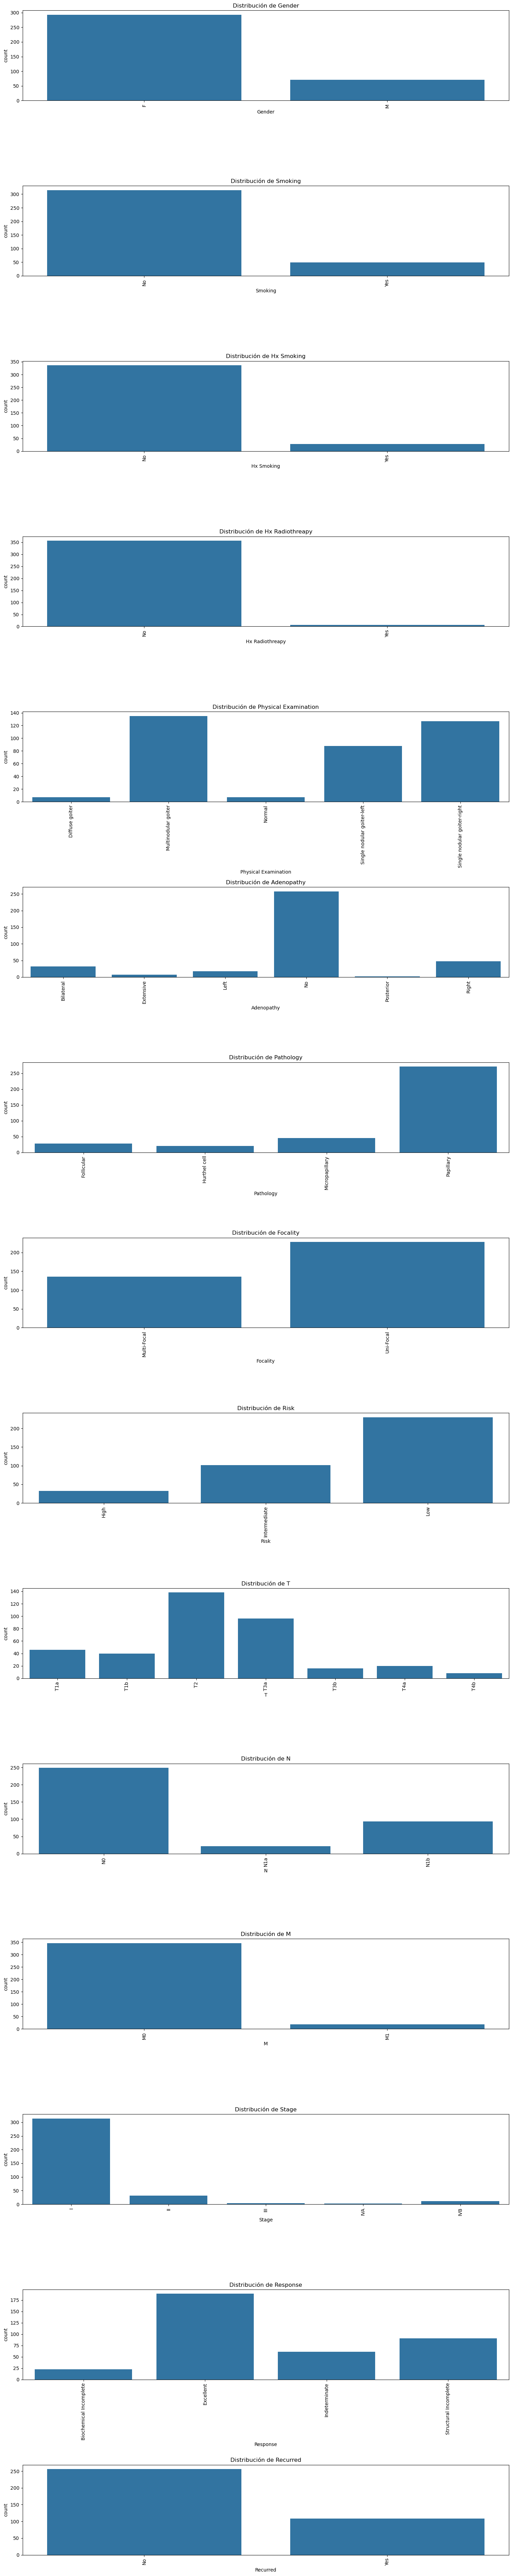

In [31]:
# Variables categóricas
# Seleccionar las columnas categóricas
categorical_columns = data_train.select_dtypes(include='category').columns

# Configurar el tamaño de la cuadrícula
n_cols = 1  # Número de gráficos por fila
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols  # Calcular el número de filas necesarias

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))  # Ajustar el tamaño total del canvas
axes = axes.flatten()  # Asegurar que los ejes están en un arreglo plano

# Crear un gráfico para cada columna categórica
for i, col in enumerate(categorical_columns):
    sns.countplot(data=data_train, x=col, ax=axes[i])
    axes[i].set_title(f'Distribución de {col}', fontsize=12)
    axes[i].tick_params(axis='x', rotation=90)  # Rotar etiquetas del eje X

# Si hay más ejes que gráficos, ocultarlos
for j in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[j])  # Eliminar ejes no utilizados

# Ajustar el espacio entre filas
plt.subplots_adjust(hspace=60)  # Cambiar a un valor mayor para aumentar el espacio entre filas

plt.tight_layout()  # Ajustar los espacios entre gráficos (opcional)
plt.show()

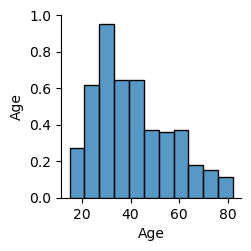

In [ ]:
# Diagrama de pares de todas las variables numérica del data set
sns.pairplot(data_train)

### Detección de valores atípicos

In [34]:
# Se vuelven a obtener las columnas numéricas actualizadas
numeric_columns = data_train.select_dtypes(include=['float64', 'int64']).columns

In [35]:
numeric_columns

Index(['Age'], dtype='object')

se genera gráfico de boxplot para la variable Age, y se identifica que no hay valores atípicos

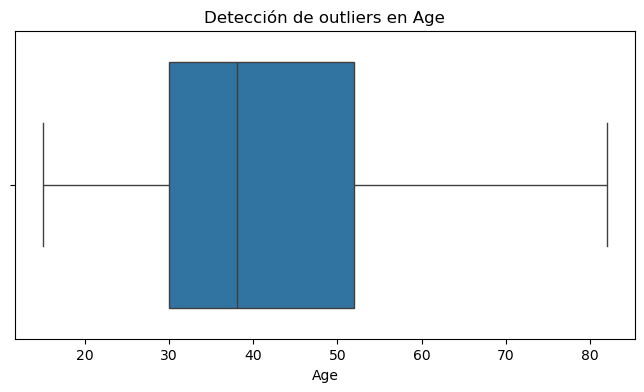

In [38]:
numeric_columns = data_train.select_dtypes(include='number').columns
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=data_train, x=col)
    plt.title(f'Detección de outliers en {col}')
    plt.show()

# Feature Engineering

## División de los datos

In [58]:
# Se crean las variables X e y
X = data_train.drop('Recurred', axis=1)
y = data_train['Recurred']

In [59]:
# Division 70-30 de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [60]:
print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de y_train:", y_train.shape)
print("Dimensiones de X_test:", X_test.shape)
print("Dimensiones de y_test:", y_test.shape)

Dimensiones de X_train: (254, 15)
Dimensiones de y_train: (254,)
Dimensiones de X_test: (110, 15)
Dimensiones de y_test: (110,)


## Datos de entrenamiento

### Codificación de variables categóricas

Se utilizará un codificador de objetivos (TargetEncoder) para transformar las variables categóricas en el conjunto de entrenamiento (X_train) en valores numéricos, basándose en la relación entre las categorías y el objetivo (y_train)

In [61]:
print(X_train.dtypes)

Age                        int64
Gender                  category
Smoking                 category
Hx Smoking              category
Hx Radiothreapy         category
Physical Examination    category
Adenopathy              category
Pathology               category
Focality                category
Risk                    category
T                       category
N                       category
M                       category
Stage                   category
Response                category
dtype: object


In [64]:
# Asegúrate de que y_train sea un pandas Series
y_train = pd.Series(y_train)

# Asegúrate de que X_train sea un DataFrame (si no lo es ya)
X_train = pd.DataFrame(X_train)

# Asegúrate de que 'variables_categoricas' contenga las variables categóricas que necesitas
variables_categoricas = data_train.select_dtypes(include=['category']).columns.tolist()
variables_categoricas.remove('Recurred')

# Crear el codificador y aplicar la transformación
encoder = TargetEncoder(cols=variables_categoricas)
X_train[variables_categoricas] = encoder.fit_transform(X_train[variables_categoricas], y_train)

AttributeError: 'numpy.ndarray' object has no attribute 'groupby'

In [83]:
# Se verifica como quedaron los valores de X_train
X_train

MSSubClass       MSZoning       LotShape    LandContour  \
135   182196.556878  187337.821561  164212.472571  177182.453664   
1452  163519.143228  126071.671282  164212.472571  177182.453664   
762   230364.883662  211039.952759  164212.472571  177182.453664   
932   182196.556878  187337.821561  198875.758721  177182.453664   
435   230364.883662  187337.821561  210119.087119  177182.453664   
629   171829.226519  187337.821561  164212.472571  177182.453664   
1210  230364.883662  187337.821561  164212.472571  177182.453664   
1118  171829.226519  187337.821561  164212.472571  177182.453664   
1084  230364.883662  187337.821561  210119.087119  177182.453664   
158   230364.883662  211039.952759  164212.472571  177182.453664   
967   182196.556878  187337.821561  198875.758721  177182.453664   
1259  182196.556878  187337.821561  164212.472571  177182.453664   
551   182196.556878  126071.671282  164212.472571  177182.453664   
497   142270.796615  187337.821561  164212.472571  177182.453664   
1031  180469.757810  187337.821561  164212.472571  177182.453664   
1262  142270.796615  187337.821561  164212.472571  177182.453664   
1013  101910.667801  126071.671282  164212.472571  177182.453664   
1311  182196.556878  187337.821561  164212.472571  177182.453664   
566   230364.883662  187337.821561  198875.758721  177182.453664   
610   230364.883662  187337.821561  164212.472571  177182.453664   
1278  230364.883662  187337.821561  164212.472571  177182.453664   
1263  171297.083724  187337.821561  164212.472571  177182.453664   
816   182196.556878  187337.821561  198875.758721  177182.453664   
438   101910.667801  187337.821561  164212.472571  177182.453664   
940   140410.352792  187337.821561  198875.758721  177182.453664   
96    182196.556878  187337.821561  198875.758721  177182.453664   
560   182196.556878  187337.821561  198875.758721  177182.453664   
1182  230364.883662  187337.821561  198875.758721  177182.453664   
471   230364.883662  187337.821561  164212.472571  177182.453664   
1004  200379.615206  187337.821561  164212.472571  177182.453664   
410   182196.556878  187337.821561  164212.472571  177182.453664   
963   182196.556878  187337.821561  198875.758721  177182.453664   
582   140410.352792  187337.821561  164212.472571  177182.453664   
156   182196.556878  187337.821561  164212.472571  177182.453664   
594   182196.556878  187337.821561  198875.758721  177182.453664   
617   160550.983836  187337.821561  164212.472571  220951.264656   
447   230364.883662  187337.821561  198875.758721  177182.453664   
1205  182196.556878  187337.821561  198875.758721  177182.453664   
861   149183.527880  187337.821561  164212.472571  177182.453664   
1010  142270.796615  187337.821561  164212.472571  177182.453664   
390   142270.796615  187337.821561  164212.472571  177182.453664   
1409  230364.883662  187337.821561  198875.758721  177182.453664   
847   182196.556878  187337.821561  198875.758721  177182.453664   
1284  142270.796615  187337.821561  164212.472571  177182.453664   
615   169593.016792  187337.821561  164212.472571  177182.453664   
613   182196.556878  187337.821561  164212.472571  177182.453664   
1303  182196.556878  187337.821561  164212.472571  177182.453664   
486   182196.556878  187337.821561  164212.472571  177182.453664   
561   182196.556878  187337.821561  164212.472571  177182.453664   
308   101910.667801  187337.821561  198875.758721  177182.453664   
461   171297.083724  187337.821561  164212.472571  177182.453664   
1142  230364.883662  187337.821561  164212.472571  177182.453664   
730   200379.615206  187337.821561  198875.758721  177182.453664   
1155  182196.556878  187337.821561  198875.758721  177182.453664   
1203  182196.556878  187337.821561  164212.472571  177182.453664   
700   182196.556878  187337.821561  164212.472571  177182.453664   
849   171829.226519  187337.821561  164212.472571  177182.453664   
1260  230364.883662  187337.821561  188055.060207  177182.453664 

### Estandarización de los datos
Se utilizará PowerTransformer que una técnica que transforma los datos para hacerlos más parecidos a una distribución normal. Esto puede mejorar el desempeño de los modelos que suponen normalidad en las características (como regresión lineal, SVM, etc.)

In [85]:
# Una vez aplicado el encoding se normalizan las variables para que tengan media 0 y desviación estandar 1
# y conserven la misma escala
scaler_train = PowerTransformer(method='yeo-johnson', standardize=True)

In [86]:
X_train[X_train.columns] = scaler_train.fit_transform(X_train[X_train.columns])

d:\carpetas_sistema\escritorio\Especializacion\11. Machine Learning\Talleres\taller1_ML\venv\Lib\site-packages\numpy\_core\_methods.py:197: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
d:\carpetas_sistema\escritorio\Especializacion\11. Machine Learning\Talleres\taller1_ML\venv\Lib\site-packages\numpy\_core\_methods.py:208: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


In [88]:
# Se verifica como quedaron los valores de X_train
X_train

MSSubClass  MSZoning      LotShape  LandContour     LotConfig  \
135     0.035580  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
1452   -0.524881 -1.935729 -1.720846e-15    -0.007857 -1.110223e-16   
762     1.553626  2.937222 -1.720846e-15    -0.007857 -1.110223e-16   
932     0.035580  0.240152  2.831069e-15    -0.007857 -1.665335e-16   
435     1.553626  0.240152  3.830269e-15    -0.007857  1.498801e-15   
629    -0.277610  0.240152 -1.720846e-15    -0.007857 -1.665335e-16   
1210    1.553626  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
1118   -0.277610  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
1084    1.553626  0.240152  3.830269e-15    -0.007857 -1.665335e-16   
158     1.553626  2.937222 -1.720846e-15    -0.007857 -1.665335e-16   
967     0.035580  0.240152  2.831069e-15    -0.007857 -1.110223e-16   
1259    0.035580  0.240152 -1.720846e-15    -0.007857  0.000000e+00   
551     0.035580 -1.935729 -1.720846e-15    -0.007857 -1.110223e-16   
497    -1.140955  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
1031   -0.016940  0.240152 -1.720846e-15    -0.007857 -1.665335e-16   
1262   -1.140955  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
1013   -2.239016 -1.935729 -1.720846e-15    -0.007857 -1.110223e-16   
1311    0.035580  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
566     1.553626  0.240152  2.831069e-15    -0.007857 -1.110223e-16   
610     1.553626  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
1278    1.553626  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
1263   -0.293546  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
816     0.035580  0.240152  2.831069e-15    -0.007857 -1.665335e-16   
438    -2.239016  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
940    -1.193733  0.240152  2.831069e-15    -0.007857 -1.110223e-16   
96      0.035580  0.240152  2.831069e-15    -0.007857 -1.110223e-16   
560     0.035580  0.240152  2.831069e-15    -0.007857 -1.110223e-16   
1182    1.553626  0.240152  2.831069e-15    -0.007857 -1.665335e-16   
471     1.553626  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
1004    0.596886  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
410     0.035580  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
963     0.035580  0.240152  2.831069e-15    -0.007857 -1.665335e-16   
582    -1.193733  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
156     0.035580  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
594     0.035580  0.240152  2.831069e-15    -0.007857 -1.110223e-16   
617    -0.612361  0.240152 -1.720846e-15     3.899417 -1.665335e-16   
447     1.553626  0.240152  2.831069e-15    -0.007857 -1.665335e-16   
1205    0.035580  0.240152  2.831069e-15    -0.007857  1.498801e-15   
861    -0.943170  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
1010   -1.140955  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
390    -1.140955  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
1409    1.553626  0.240152  2.831069e-15    -0.007857  1.498801e-15   
847     0.035580  0.240152  2.831069e-15    -0.007857  1.498801e-15   
1284   -1.140955  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
615    -0.344485  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
613     0.035580  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
1303    0.035580  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
486     0.035580  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
561     0.035580  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
308    -2.239016  0.240152  2.831069e-15    -0.007857 -1.110223e-16   
461    -0.293546  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
1142    1.553626  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
730     0.596886  0.240152  2.831069e-15    -0.007857 -1.110223e-16   
1155    0.035580  0.240152  2.831069e-15    -0.007857 -1.665335e-16   
1203    0.035580  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
700     0.035580  0.240152 -1.

## Datos de prueba
Se hace lo mismo que se hizo con los datos de entrenamiento

### Codificación de variables categóricas

In [89]:
# Aplicar la misma codificación a los datos de test
X_test[variables_categoricas] = encoder.transform(X_test[variables_categoricas])

In [90]:
X_test

MSSubClass       MSZoning       LotShape    LandContour  \
892   182196.556878  187337.821561  164212.472571  177182.453664   
1105  230364.883662  187337.821561  198875.758721  177182.453664   
413   101910.667801  126071.671282  164212.472571  177182.453664   
522   142270.796615  126071.671282  164212.472571  177182.453664   
1036  182196.556878  187337.821561  198875.758721  220951.264656   
614   163519.143228  126071.671282  164212.472571  177182.453664   
218   142270.796615  187337.821561  198875.758721  177182.453664   
1160  142205.488894  187337.821561  164212.472571  177182.453664   
649   163519.143228  126071.671282  164212.472571  177182.453664   
887   142270.796615  187337.821561  198875.758721  177182.453664   
576   142270.796615  187337.821561  164212.472571  177182.453664   
1252  182196.556878  187337.821561  164212.472571  177182.453664   
1061  101910.667801  163348.021475  164212.472571  192032.610808   
567   182196.556878  187337.821561  198875.758721  177182.453664   
1108  230364.883662  187337.821561  164212.472571  177182.453664   
1113  182196.556878  187337.821561  164212.472571  177182.453664   
168   230364.883662  187337.821561  198875.758721  177182.453664   
1102  182196.556878  187337.821561  164212.472571  177182.453664   
1120  101910.667801  126071.671282  164212.472571  145037.372210   
67    182196.556878  187337.821561  198875.758721  177182.453664   
1040  182196.556878  187337.821561  164212.472571  177182.453664   
453   230364.883662  211039.952759  164212.472571  177182.453664   
670   230364.883662  187337.821561  164212.472571  177182.453664   
1094  182196.556878  187337.821561  164212.472571  177182.453664   
192   182196.556878  187337.821561  198875.758721  177182.453664   
123   200379.615206  187337.821561  164212.472571  177182.453664   
415   182196.556878  187337.821561  198875.758721  177182.453664   
277   182196.556878  187337.821561  164212.472571  177182.453664   
433   230364.883662  187337.821561  198875.758721  177182.453664   
1317  200379.615206  211039.952759  164212.472571  177182.453664   
184   142270.796615  187337.821561  198875.758721  177182.453664   
554   230364.883662  187337.821561  164212.472571  177182.453664   
1173  142270.796615  187337.821561  198875.758721  145037.372210   
76    182196.556878  187337.821561  198875.758721  177182.453664   
906   182196.556878  187337.821561  198875.758721  177182.453664   
674   182196.556878  187337.821561  164212.472571  177182.453664   
1398  142270.796615  187337.821561  164212.472571  177182.453664   
374   230364.883662  187337.821561  164212.472571  177182.453664   
1032  230364.883662  187337.821561  198875.758721  177182.453664   
259   182196.556878  126071.671282  164212.472571  177182.453664   
51    142270.796615  126071.671282  164212.472571  177182.453664   
244   230364.883662  187337.821561  198875.758721  177182.453664   
1101  182196.556878  187337.821561  198875.758721  177182.453664   
581   182196.556878  187337.821561  164212.472571  177182.453664   
679   182196.556878  187337.821561  198875.758721  177182.453664   
1132  171297.083724  126071.671282  164212.472571  177182.453664   
1220  182196.556878  187337.821561  198875.758721  177182.453664   
49    182196.556878  187337.821561  164212.472571  177182.453664   
591   230364.883662  187337.821561  198875.758721  177182.453664   
1269  142270.796615  187337.821561  164212.472571  177182.453664   
1249  182196.556878  187337.821561  164212.472571  177182.453664   
1138  182196.556878  187337.821561  198875.758721  177182.453664   
490   142205.488894  126071.671282  164212.472571  177182.453664   
1024  182196.556878  187337.821561  198875.758721  177182.453664   
811   200379.615206  126071.671282  164212.472571  177182.453664   
141   182196.556878  187337.821561  164212.472571  177182.453664   
846   230364.883662  187337.821561  164212.472571  177182.453664   
925   182196.556878  187337.821561  198875.758721  177182.453664 

### Estandarización de los datos

In [91]:

# Aplicar la misma transformación a los datos de test
X_test[X_test.columns] = scaler_train.transform(X_test[X_test.columns])

In [92]:
X_test

MSSubClass  MSZoning      LotShape  LandContour     LotConfig  \
892     0.035580  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
1105    1.553626  0.240152  2.831069e-15    -0.007857 -1.665335e-16   
413    -2.239016 -1.935729 -1.720846e-15    -0.007857 -1.110223e-16   
522    -1.140955 -1.935729 -1.720846e-15    -0.007857 -1.665335e-16   
1036    0.035580  0.240152  2.831069e-15     3.899417 -1.110223e-16   
614    -0.524881 -1.935729 -1.720846e-15    -0.007857 -1.110223e-16   
218    -1.140955  0.240152  2.831069e-15    -0.007857 -1.665335e-16   
1160   -1.142811  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
649    -0.524881 -1.935729 -1.720846e-15    -0.007857 -1.110223e-16   
887    -1.140955  0.240152  2.831069e-15    -0.007857 -1.110223e-16   
576    -1.140955  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
1252    0.035580  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
1061   -2.239016 -1.138979 -1.720846e-15     1.422628 -1.110223e-16   
567     0.035580  0.240152  2.831069e-15    -0.007857 -1.110223e-16   
1108    1.553626  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
1113    0.035580  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
168     1.553626  0.240152  2.831069e-15    -0.007857 -1.110223e-16   
1102    0.035580  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
1120   -2.239016 -1.935729 -1.720846e-15    -3.595853 -1.110223e-16   
67      0.035580  0.240152  2.831069e-15    -0.007857 -1.110223e-16   
1040    0.035580  0.240152 -1.720846e-15    -0.007857 -1.665335e-16   
453     1.553626  2.937222 -1.720846e-15    -0.007857 -1.110223e-16   
670     1.553626  0.240152 -1.720846e-15    -0.007857  0.000000e+00   
1094    0.035580  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
192     0.035580  0.240152  2.831069e-15    -0.007857 -1.110223e-16   
123     0.596886  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
415     0.035580  0.240152  2.831069e-15    -0.007857 -1.110223e-16   
277     0.035580  0.240152 -1.720846e-15    -0.007857 -1.665335e-16   
433     1.553626  0.240152  2.831069e-15    -0.007857 -1.665335e-16   
1317    0.596886  2.937222 -1.720846e-15    -0.007857 -1.665335e-16   
184    -1.140955  0.240152  2.831069e-15    -0.007857 -1.110223e-16   
554     1.553626  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
1173   -1.140955  0.240152  2.831069e-15    -3.595853 -1.110223e-16   
76      0.035580  0.240152  2.831069e-15    -0.007857 -1.110223e-16   
906     0.035580  0.240152  2.831069e-15    -0.007857 -1.665335e-16   
674     0.035580  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
1398   -1.140955  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
374     1.553626  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
1032    1.553626  0.240152  2.831069e-15    -0.007857 -1.665335e-16   
259     0.035580 -1.935729 -1.720846e-15    -0.007857 -1.110223e-16   
51     -1.140955 -1.935729 -1.720846e-15    -0.007857 -1.110223e-16   
244     1.553626  0.240152  2.831069e-15    -0.007857 -1.110223e-16   
1101    0.035580  0.240152  2.831069e-15    -0.007857 -1.110223e-16   
581     0.035580  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
679     0.035580  0.240152  2.831069e-15    -0.007857 -1.110223e-16   
1132   -0.293546 -1.935729 -1.720846e-15    -0.007857 -1.110223e-16   
1220    0.035580  0.240152  2.831069e-15    -0.007857 -1.110223e-16   
49      0.035580  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
591     1.553626  0.240152  2.831069e-15    -0.007857 -1.665335e-16   
1269   -1.140955  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
1249    0.035580  0.240152 -1.720846e-15    -0.007857 -1.110223e-16   
1138    0.035580  0.240152  2.831069e-15    -0.007857 -1.110223e-16   
490    -1.142811 -1.935729 -1.720846e-15    -0.007857 -1.110223e-16   
1024    0.035580  0.240152  2.831069e-15    -0.007857 -1.665335e-16   
811     0.596886 -1.935729 -1.720846e-15    -0.007857 -1.110223e-16   
141     0.035580  0.240152 -1.

# Entrenamiento y selección de modelos

## Entrenamiento con validación cruzada

In [ ]:
# Métricas a utilizar
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import model_selection

In [99]:
# Validación cruzada con KFold
seed = 2
models = []

#logistic Regression
models.append(('LR', LinearRegression()))

# Random Forest
models.append(('RF', RandomForestRegressor()))

# XGB
models.append(('XGB', XGBRegressor()))

# evaluate each model in turn
results = []
names = []

scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error']

print('Media del desempeño de los modelos en el conjunto de testeo')
print('#'*50)

for name, model in models:
	# Kfol cross validation for model selection
	kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
	#X train , y train
	cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring, n_jobs=-1)
	results.append(cv_results)
	names.append(name)
	msg = {}
	msg = {
			'mean': {
					'r2': np.mean(cv_results['test_r2']),
					'neg_mean_absolute_error': np.mean(cv_results['test_neg_mean_absolute_error']),
					'neg_mean_absolute_percentage_error': np.mean(cv_results['test_neg_mean_absolute_percentage_error'])
			},
			'std': {
					'r2': np.std(cv_results['test_r2']),
					'neg_mean_absolute_error': np.std(cv_results['test_neg_mean_absolute_error']),
					'neg_mean_absolute_percentage_error': np.std(cv_results['test_neg_mean_absolute_percentage_error'])
			}
	}	
	print(name)
	print(pd.DataFrame(msg))
	print("#"*50)

Media del desempeño de los modelos en el conjunto de testeo
##################################################
LR
                                            mean          std
r2                                      0.841727     0.060414
neg_mean_absolute_error            -19310.144731  1471.011863
neg_mean_absolute_percentage_error     -0.122268     0.012630
##################################################
RF
                                            mean          std
r2                                      0.866335     0.044696
neg_mean_absolute_error            -16433.792026  1407.144002
neg_mean_absolute_percentage_error     -0.102391     0.010940
##################################################
XGB
                                            mean          std
r2                                      0.867403     0.042815
neg_mean_absolute_error            -16833.041209  1101.329607
neg_mean_absolute_percentage_error     -0.103377     0.010072
#################################

## Selección del modelo


Modelo	R² (mean)	R² (std)
LR	0.8417	0.0604
RF	0.8663	0.0447
XGB	0.8674	0.0428

XGB tiene el mejor R² medio y menor desviación estándar, lo que sugiere mayor estabilidad en su rendimiento.

Modelo	Neg MAE (mean)	Neg MAE (std)
LR	-19,310.14	1,471.01
RF	-16,433.79	1,407.14
XGB	-16,833.04	1,101.33

RF tiene el menor MAE promedio, pero XGB es competitivo con menor desviación estándar, lo que indica más consistencia en su error.

Modelo	Neg MAPE (mean)	Neg MAPE (std)
LR	-0.1223	0.0126
RF	-0.1024	0.0109
XGB	-0.1034	0.0101

RF tiene el menor MAPE promedio, pero XGB tiene una desviación estándar más baja, mostrando resultados más consistentes.

Como conclusión:
XGB tiene el mejor equilibrio entre R² alto, bajo MAE, y consistencia en las métricas (menor desviación estándar en general).
RF también es competitivo, con menor MAE y MAPE promedio, pero su variabilidad es ligeramente mayor.

Entonces el modelo XGBRegressor será el utilizado en el entrenamiento.


In [100]:
# Se procederá a validar la importancia de las variables con el fin de evaluar
# si se puede reducir su cantidad
modelo_sfs = XGBRegressor()
sfs = SequentialFeatureSelector(
    modelo_sfs,
    n_features_to_select='auto',
    direction='forward',
    scoring='neg_mean_absolute_error',
    cv=5,
    n_jobs=-1
)
sfs.fit(X_train, y_train)
sfs.get_feature_names_out().tolist()

['MSZoning',
 'LandContour',
 'Neighborhood',
 'Condition2',
 'BldgType',
 'OverallQual',
 'YearRemodAdd',
 'RoofStyle',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'TotalBsmtSF',
 'CentralAir',
 'GrLivArea',
 'Functional',
 'GarageCars',
 'GarageQual',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [102]:
variables_seleccionadas = sfs.get_feature_names_out().tolist()
variables_seleccionadas

['MSZoning',
 'LandContour',
 'Neighborhood',
 'Condition2',
 'BldgType',
 'OverallQual',
 'YearRemodAdd',
 'RoofStyle',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'TotalBsmtSF',
 'CentralAir',
 'GrLivArea',
 'Functional',
 'GarageCars',
 'GarageQual',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

Se calcula el Factor de Inflación de Varianza (VIF) para las variables seleccionadas, con el fin de detectar multicolinealidad entre las variables independientes. 
La multicolinealidad ocurre cuando dos o más variables están altamente correlacionadas, lo que puede causar inestabilidad en los coeficientes de un modelo de regresión.

In [104]:
# Cálculo del VIF
vif = pd.DataFrame()
vif['variables'] = X_train[variables_seleccionadas].columns
vif['VIF'] = [variance_inflation_factor(X_train[variables_seleccionadas].values, i) for i in range(X_train[variables_seleccionadas].shape[1])]
vif

variables       VIF
0        MSZoning  1.387671
1     LandContour  1.070056
2    Neighborhood  2.788750
3      Condition2  1.044271
4        BldgType  1.088354
5     OverallQual  3.200881
6    YearRemodAdd  1.826088
7       RoofStyle  1.126138
8        BsmtQual  2.792388
9        BsmtCond  1.223002
10   BsmtExposure  1.534456
11   BsmtFinType1  1.787462
12   BsmtFinType2  1.168467
13    TotalBsmtSF  1.860521
14     CentralAir  1.349817
15      GrLivArea  1.890221
16     Functional  1.137273
17     GarageCars  2.226531
18     GarageQual  1.397832
19     PavedDrive  1.262217
20       SaleType  3.164872
21  SaleCondition  1.276946

No se identifica multicolinealidad en las variables independientes

In [105]:
# Se entrena el modelo Random Forest con las variables seleccionadas
modelo_seleccionado = XGBRegressor(random_state=42, n_jobs=-1)
modelo_seleccionado.fit(X_train[variables_seleccionadas], y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [106]:
# Calcular predicciones
y_pred = modelo_seleccionado.predict(X_test[variables_seleccionadas])

In [107]:
# Calcular metricas de desempeño
r2 = metrics.r2_score(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = metrics.mean_absolute_percentage_error(y_test, y_pred)

In [108]:
# Imprimir metricas de desempeño
print(f"R2: {r2}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}")

R2: 0.8914799327965495
MAE: 16460.356485445205
MAPE: 0.1059518734584007


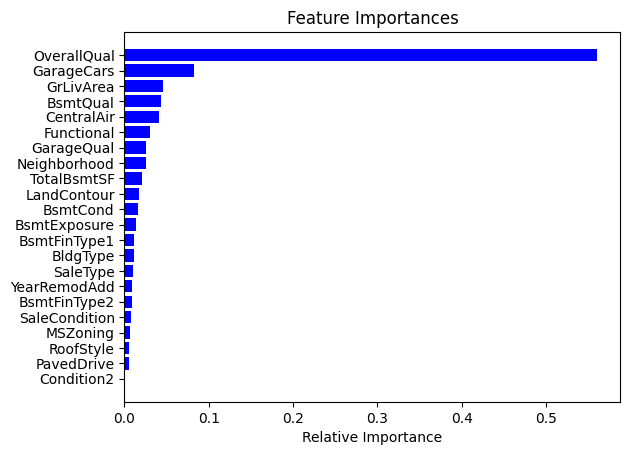

In [109]:
# Gráfica de importancia de las variables para el modelo XGBRegressor
features = X_train[variables_seleccionadas].columns
importances = modelo_seleccionado.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Diagnóstico de los residuos

In [110]:
# Predicciones en el conjunto de entrenamiento
predicciones_entrenamiento = modelo_seleccionado.predict(X_train[variables_seleccionadas])

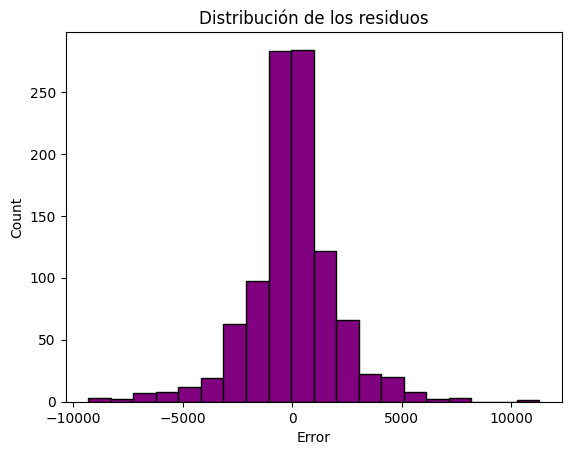

In [112]:
# Calcular los residuos
residuales = predicciones_entrenamiento - y_train

# Plot the residuals in a histogram
plt.hist(residuales, color = 'purple', bins = 20,
         edgecolor = 'black')
plt.xlabel('Error'); plt.ylabel('Count')
plt.title('Distribución de los residuos');

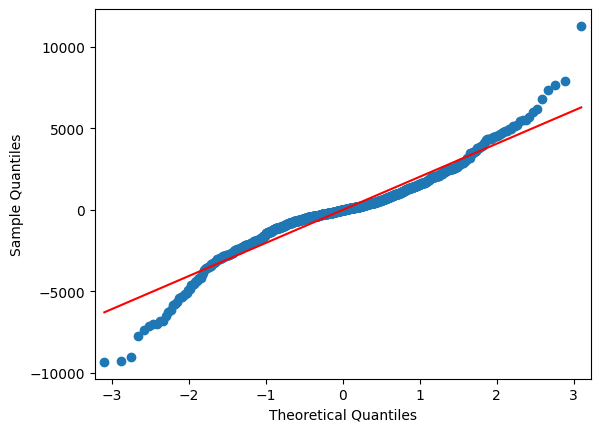

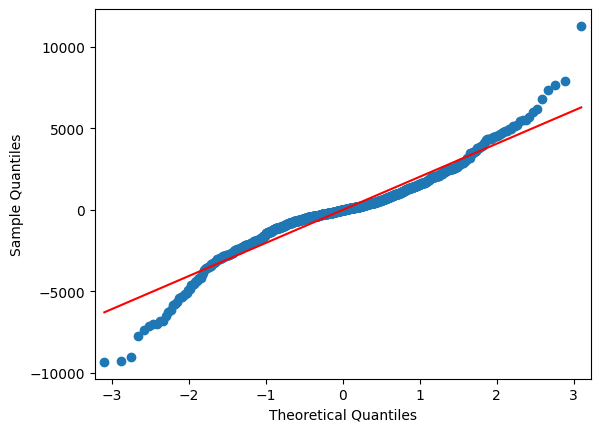

In [115]:
# QQ plot
sm.qqplot(residuales, line='s')

Los residuos parecen distribuirse de forma aleatoria en torno a cero, manteniendo aproximadamente la misma variabilidad a lo largo del eje X. Este patrón apunta a que se cumple la normalidad y la homocedasticidad de los residuos.

### Tests de Normalidad
- **Hipótesis Nula (H0)**: Los residuos siguen una distribución normal.
- **Hipótesis Alternativa (H1)**: Los residuos no siguen una distribución normal.

La hipótesis nula considera que los datos siguen una distribución normal, por lo tanto, si el p-value no es inferior al nivel de referencia alpha seleccionado, no hay evidencias para descartar que los datos se distribuyen de forma normal.

In [117]:
# Normalidad de los residuos Shapiro-Wilk test
shapiro_test = stats.shapiro(residuales)
print(f"Test Shapiro-Wilk: estadístico = {shapiro_test[0]}, p-value = {shapiro_test[1]}")

# Normalidad de los residuos D'Agostino's K-squared test
k2, p_value = stats.normaltest(residuales)
print(f"Test D'Agostino's K-squared: estadístico = {k2}, p-value = {p_value}")


Test Shapiro-Wilk: estadístico = 0.9384136522695979, p-value = 3.769418827824038e-20
Test D'Agostino's K-squared: estadístico = 98.76607143284605, p-value = 3.5745394027213977e-22


Para el Test Shapiro-Wilk el estadístico es 0.938, lo que indica que los datos tienen una distribución algo alejada de la normal, ya que valores cercanos a 1 indican una mayor probabilidad de seguir una distribución normal.
El p-value es extremadamente bajo (aproximadamente 
3.77 × 10−20), lo que sugiere que se rechaza la hipótesis nula de normalidad. En otras palabras, hay evidencia estadística suficiente para afirmar que los datos no siguen una distribución normal.

Para el test D'Agostino's K-squared estadístico es 98.77, que es un valor bastante alto, lo que indica una desviación considerable de la normalidad.
El p-value también es muy bajo (3.57×10−22), lo que refuerza la conclusión de que los datos no siguen una distribución normal.

### Homocedasticidad

- **Estadístico (fvalue)**: Este es el valor del estadístico de la prueba. Un valor más alto indica mayor evidencia en contra de la hipótesis nula.

- **p-value (f_p_value)**: Este valor indica la probabilidad de observar un estadístico tan extremo como el calculado, dado que la hipótesis nula es verdadera.

#### Decisiones Basadas en el p-value

- **Si el p-value es menor que un nivel de significancia (por ejemplo, 0.05)**:
- **Rechazamos la hipótesis nula (H0)**. Esto sugiere que hay evidencia suficiente para concluir que hay heterocedasticidad en los residuos, es decir, la varianza de los errores no es constante.

- **Si el p-value es mayor que el nivel de significancia**:
- **No rechazamos la hipótesis nula (H0)**. Esto sugiere que no hay evidencia suficiente para concluir que hay heterocedasticidad, lo que implica que los residuos pueden considerarse homocedásticos.

<Axes: xlabel='SalePrice', ylabel='SalePrice'>

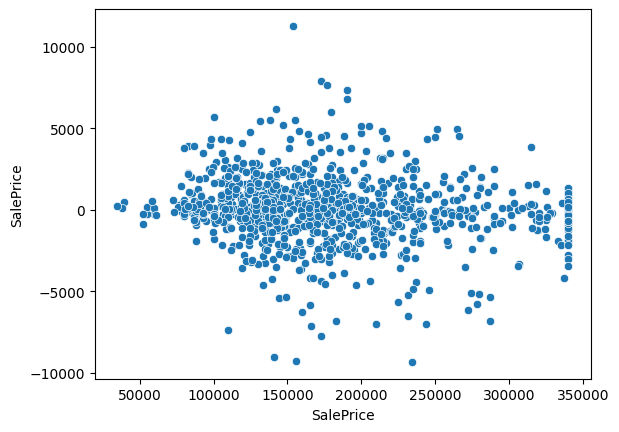

In [118]:
sns.scatterplot(x=y_train, y=residuales)

In [123]:
# Prueba de Breusch-Pagan
predictoras_constante = X_train[variables_seleccionadas]
predictoras_constante['Intercept'] = 1
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(residuales, predictoras_constante)
print(f"Estadítico= {fvalue}, p-value = {f_p_value}")

Estadítico= 3.0761787032099948, p-value = 1.0318252584116766e-05


C:\Users\Monik\AppData\Local\Temp\ipykernel_16252\1962082784.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictoras_constante['Intercept'] = 1


Estadístico (fvalue) = 3.076: Este valor es el estadístico calculado de la prueba. Un valor más alto sugiere una mayor evidencia de heterocedasticidad.
p-value = 1.03x10-5: Dado que el valor p es extremadamente bajo (mucho menor que el umbral común de 0.05), se rechaza la hipótesis nula de que no existe heterocedasticidad.

Con un p-value muy bajo, se concluye que existe heterocedasticidad en los residuos del modelo. Esto indica que la varianza de los residuos no es constante y que puede ser necesario aplicar alguna técnica para corregir la heterocedasticidad, como la transformación de variables o el uso de modelos robustos que no sean tan sensibles a este problema.